# HW 9 Problem 1

For this homework, I have collected some audio  data using the [phyphox](https://phyphox.org) app  on iphone.   The app has a lot of experimental features , but for this homework, I will work on 2 examples. In this notebook, I will use the " Audio Scope " experiment . 
## Audio data 
First, Using the app I let the app to take the data for around 10 ms. The data plot in the app looks like this :

![screenshot](ad.png)

 From the data is saved in a .csv file which has only 2 column (amplitude an time).  From the data I am going to take the fourier transform and sort out the peaks for frequencies. (same as I did in homeowrk 7) 

## Imports 

The necessary imports are given below:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %load_ext pycodestyle_magic
# %pycodestyle_on

In [2]:
df = pd.read_csv('Audio.csv',sep = ";")
df

,Time (ms),Recording (a.u.)
0,0.000000,0.000426
1,0.020834,0.000827
2,0.041668,0.001085
3,0.062502,0.001382
4,0.083336,0.001814
...,...,...
475,9.896208,-0.000407
476,9.917042,-0.000216
477,9.937876,-0.000071
478,9.958711,0.000077


In [3]:
X = df['Time (ms)']
Y = df['Recording (a.u.)']

The plot of the data in my jupyter notebook : 

Text(0.5, 1.0, 'Audio data with phyphox')

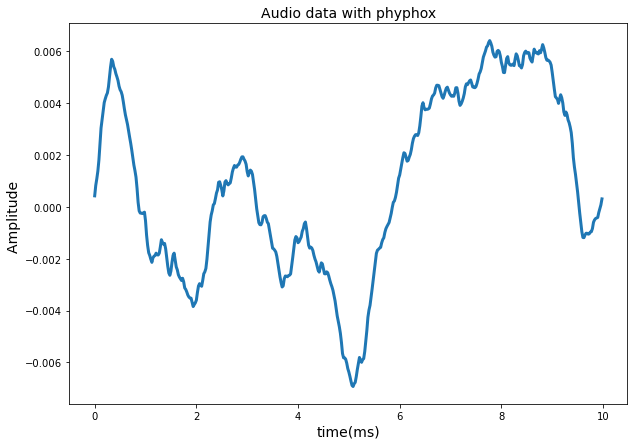

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(X,Y, lw=3)
ax.set_xlabel('time(ms)',fontsize=14)
ax.set_ylabel('Amplitude ',fontsize=14)
ax.set_title('Audio data with phyphox',fontsize=14)

So far, Its just the same as the picture above . Now I am going to do some analysis bases on what I have learned so far.

## Data analysis
 First I am going to take the fourier transfer of the acceleration using numpy fft.

In [5]:
from numpy import fft 
y = np.fft.fft(Y)
y_abs = abs(y)
print(len(y_abs),len(X))

480 480


Text(0.5, 1.0, 'FFT of Audio data ')

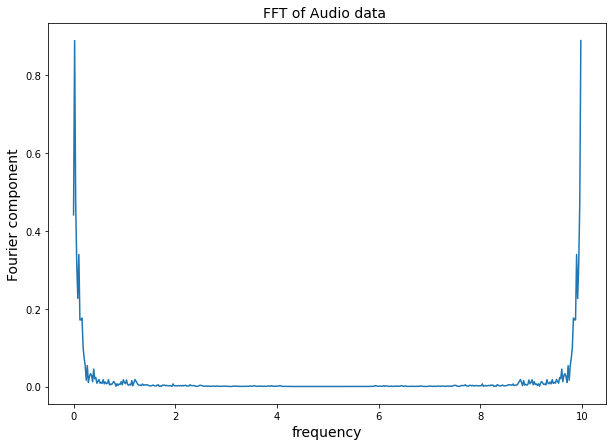

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
plt.rcParams["figure.dpi"] = 100  # just to have a better view 
ax.plot(X, y_abs)
ax.set_xlabel('frequency',fontsize=14)
ax.set_ylabel('Fourier component',fontsize=14)
ax.set_title('FFT of Audio data ',fontsize=14)

Here, my  understanding is  that  we got storng frequencies between o to 2  and 8 to 10.  In between 2 to 8 we have very weak frequencies .

I will use the numpy fftfreq to retrieve the frequencies from the data . 

Text(0.5, 1.0, 'FFt of Acceleration data')

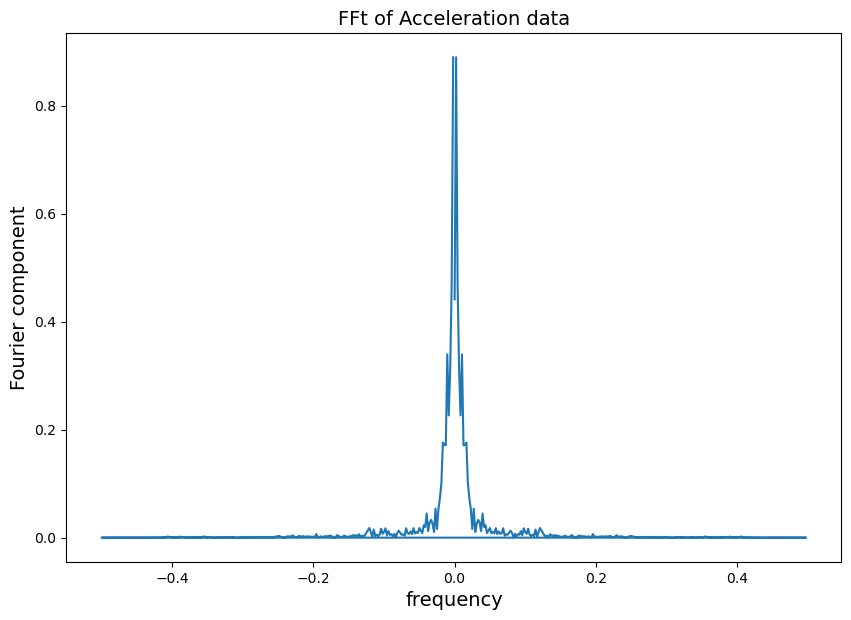

In [7]:
freqs = np.fft.fftfreq(len(y_abs))
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(freqs,y_abs)
ax.set_xlabel('frequency',fontsize=14)
ax.set_ylabel('Fourier component',fontsize=14)
ax.set_title('FFt of Acceleration data',fontsize=14)

If I want to have a look at the peaks only, I can just sor it out using scipy find peaks. 

In [8]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(y_abs, height=0)
freqs[peaks]

array([ 0.00208333,  0.01041667,  0.01666667,  0.02708333,  0.03333333,
        0.03958333,  0.04375   ,  0.05      ,  0.05416667,  0.05833333,
        0.0625    ,  0.06875   ,  0.07291667,  0.07916667,  0.08541667,
        0.08958333,  0.09375   ,  0.09791667,  0.10416667,  0.11041667,
        0.11458333,  0.12083333,  0.13541667,  0.13958333,  0.14375   ,
        0.15625   ,  0.16666667,  0.17083333,  0.175     ,  0.17916667,
        0.18333333,  0.18958333,  0.19583333,  0.20625   ,  0.21041667,
        0.21458333,  0.22083333,  0.22916667,  0.2375    ,  0.25      ,
        0.26041667,  0.26458333,  0.27291667,  0.27708333,  0.28333333,
        0.2875    ,  0.29166667,  0.3       ,  0.30625   ,  0.31666667,
        0.32083333,  0.32916667,  0.33333333,  0.3375    ,  0.34791667,
        0.35416667,  0.36458333,  0.37083333,  0.375     ,  0.38541667,
        0.38958333,  0.39791667,  0.40625   ,  0.41458333,  0.42083333,
        0.42708333,  0.43125   ,  0.4375    ,  0.44166667,  0.44

## Convert the data analysis to python

I will create a file name audio_fft.py with the following codes (taken from above) 


import math \
import numpy as np \
import matplotlib.pyplot as plt \
from numpy import fft 

def audio_fft(X,Y):

    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(X,Y, lw=3)
    ax.set_xlabel('time(ms)',fontsize=14)
    ax.set_ylabel('Amplitude ',fontsize=14)
    ax.set_title('Audio data with phyphox',fontsize=14)
    plt.show()
    y = np.fft.fft(Y)
    y_abs = abs(y)
    fig, ax = plt.subplots(figsize=(10,7))
    plt.rcParams["figure.dpi"] = 100  # just to have a better view 
    ax.plot(X, y_abs)
    ax.set_xlabel('frequency',fontsize=14)
    ax.set_ylabel('Fourier component',fontsize=14)
    ax.set_title('FFT of Audio data ',fontsize=14)
    plt.show()
    freqs = np.fft.fftfreq(len(y_abs))
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(freqs,y_abs)
    ax.set_xlabel('frequency',fontsize=14)
    ax.set_ylabel('Fourier component',fontsize=14)
    ax.set_title('FFt of Acceleration data',fontsize=14)
    plt.show()
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(y_abs, height=0)
    return freqs[peaks]

No we can call this python program  to produce all of the result above . But we will have to provide tha values for x and y , which we already have listed above. 

Checking the python file : Lets import  the audio.py 

In [54]:
import audio_fft

No I am going to call the function "audio_fft" with the values fo X and Y

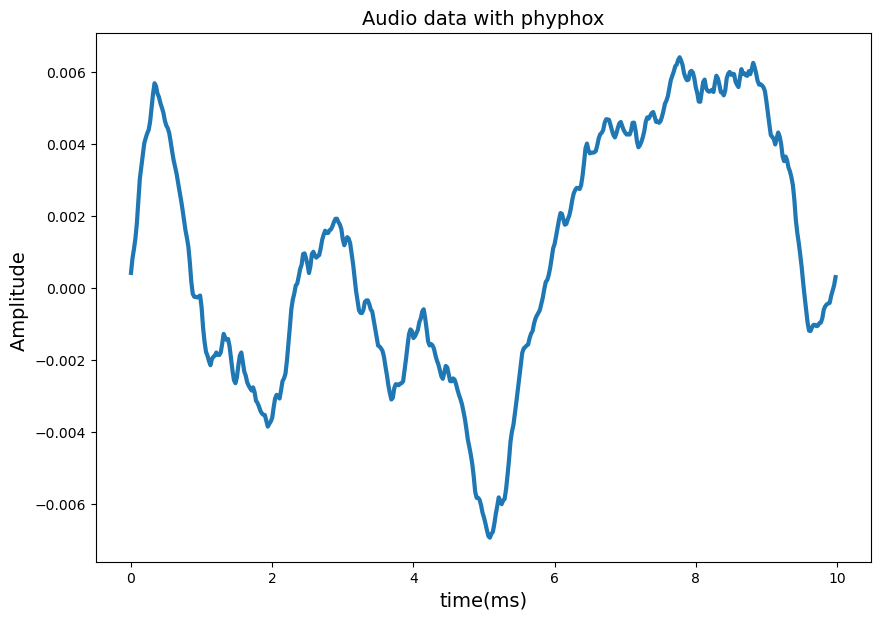

480 480


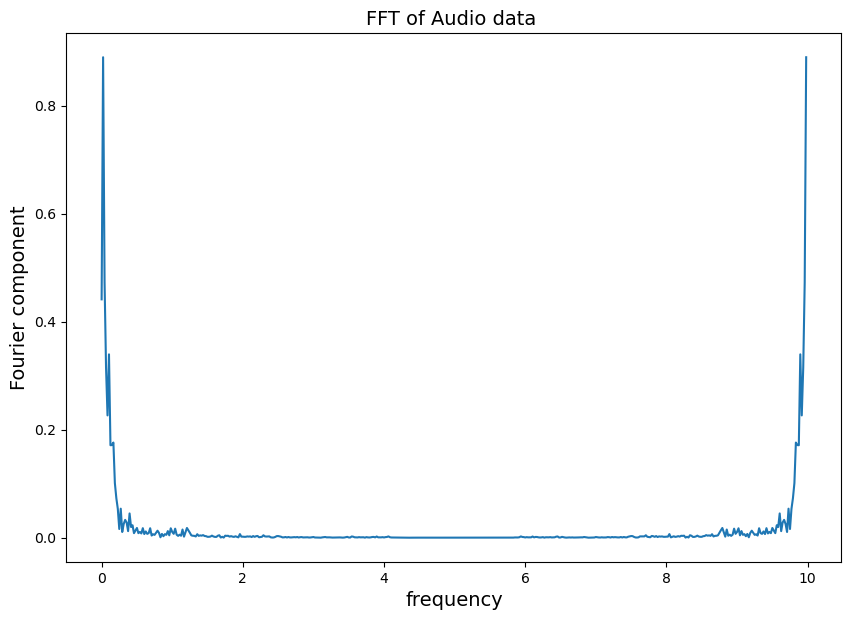

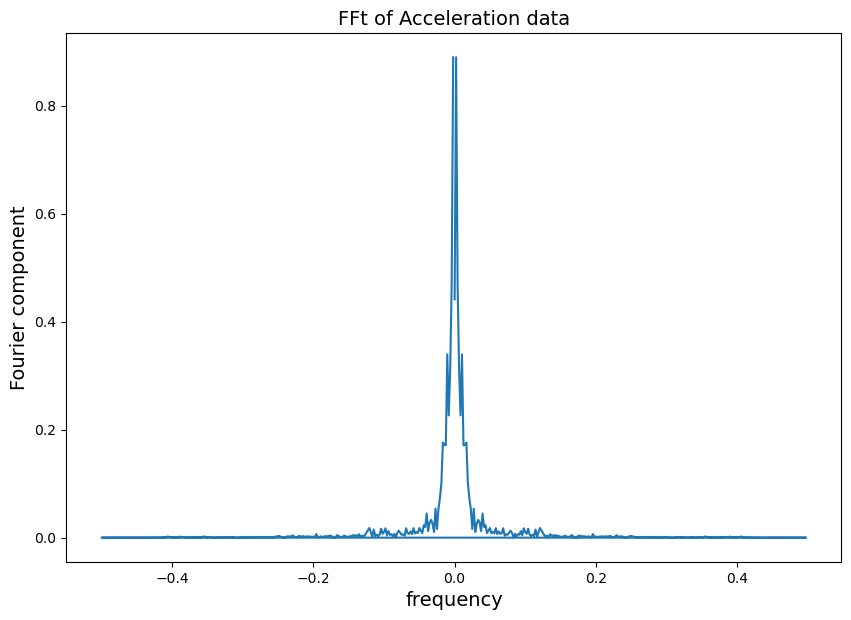

array([ 0.00208333,  0.01041667,  0.01666667,  0.02708333,  0.03333333,
        0.03958333,  0.04375   ,  0.05      ,  0.05416667,  0.05833333,
        0.0625    ,  0.06875   ,  0.07291667,  0.07916667,  0.08541667,
        0.08958333,  0.09375   ,  0.09791667,  0.10416667,  0.11041667,
        0.11458333,  0.12083333,  0.13541667,  0.13958333,  0.14375   ,
        0.15625   ,  0.16666667,  0.17083333,  0.175     ,  0.17916667,
        0.18333333,  0.18958333,  0.19583333,  0.20625   ,  0.21041667,
        0.21458333,  0.22083333,  0.22916667,  0.2375    ,  0.25      ,
        0.26041667,  0.26458333,  0.27291667,  0.27708333,  0.28333333,
        0.2875    ,  0.29166667,  0.3       ,  0.30625   ,  0.31666667,
        0.32083333,  0.32916667,  0.33333333,  0.3375    ,  0.34791667,
        0.35416667,  0.36458333,  0.37083333,  0.375     ,  0.38541667,
        0.38958333,  0.39791667,  0.40625   ,  0.41458333,  0.42083333,
        0.42708333,  0.43125   ,  0.4375    ,  0.44166667,  0.44

In [55]:
audio_fft.audio_fft(X,Y)

I am not sure how to get rid of some of this low frequencies . It could have been nice if I could do so.